In [81]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [82]:
dat = pd.read_csv(r"Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")
#make better column names
dat.rename(columns={'Company Name':'CompanyName'}, inplace=True)
dat.rename(columns={'Job created':'JobCreated'}, inplace=True)
dat.rename(columns={'Savings from beginning receiving benefits':'Savings'}, inplace=True)

dat.head()

,CompanyName,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [83]:
# How many different companies are represented in the data set?
dat.drop_duplicates(subset='CompanyName',keep='first',inplace=True)
print(str(dat.shape[0]) + ' different companies in the data set')

439 different companies in the data set


In [85]:
# What is the total number of jobs created for businesses in Queens?
print(str(dat[dat.City=='Queens'].JobCreated.sum()) + ' total jobs created in Queens')

90.0 total jobs created in Queens


In [86]:
# How many different unique email domains names are there in the data set?
print(str(dat['company contact'].count()) + ' different email domains in the data set')

439 different email domains in the data set


In [118]:
# Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
NTAbig = dat.NTA.value_counts().rename('Counts')
t = dat4.groupby('NTA').agg({'CompanyName' : ['count'],'Savings' : ['mean'], 'JobCreated' : ['sum']})
tt= dat4.groupby('NTA').count()
out_dat = t[tt.CompanyName >= 5]
del out_dat['CompanyName']
print(out_dat)


                                                       Savings JobCreated
                                                          mean        sum
NTA                                                                      
Battery Park City-Lower Manhattan                 3.798151e+06        0.0
Bushwick South                                    3.078000e+05       10.0
Carroll Gardens-Columbia Street-Red Hook          1.846839e+05        0.0
College Point                                     5.742508e+05        2.0
Crown Heights North                               1.716897e+04        0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill  4.373905e+05        0.0
East New York                                     4.579454e+05       15.0
East Williamsburg                                 1.433695e+05        0.0
Greenpoint                                        1.772221e+05        0.0
Hunters Point-Sunnyside-West Maspeth              1.606093e+05        0.0
Hunts Point                           

In [119]:
# Save your result for the previous question as a CSV file.
out_dat.to_csv('Day4_Output.csv')

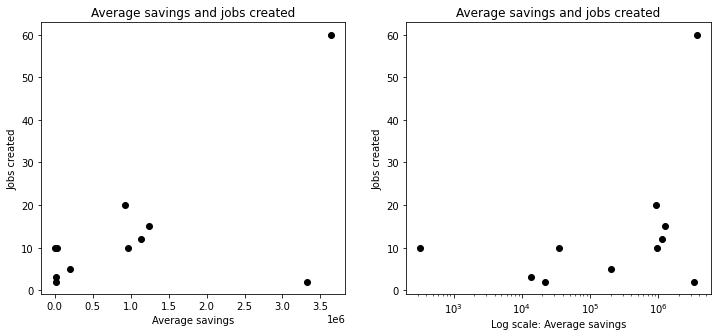

In [130]:
# Scatter plot of jobs created versus average savings. 
# Use both a standard and a logarithmic scale for the average savings.

plt.figure(figsize=[12,5])

ax1 = plt.subplot(121)
plt.scatter(dat.Savings,dat.JobCreated,c='k')
plt.title('Average savings and jobs created')
plt.ylabel('Jobs created')
plt.xlabel('Average savings');


ax2 = plt.subplot(122)
plt.scatter(dat.Savings,dat.JobCreated,c='k')
plt.title('Average savings and jobs created')
plt.ylabel('Jobs created')
plt.xlabel('Log scale: Average savings');

ax2.set_xscale('log');

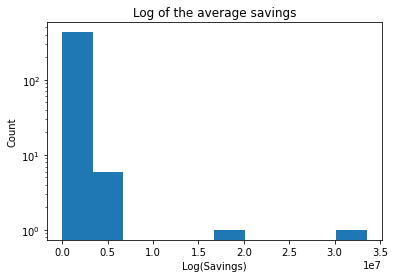

In [129]:
# Histogram of the log of the average total savings.

plt.hist(dat['Savings'], log=True)
plt.title('Log of the average savings')
plt.xlabel('Log(Savings)')
plt.ylabel('Count');

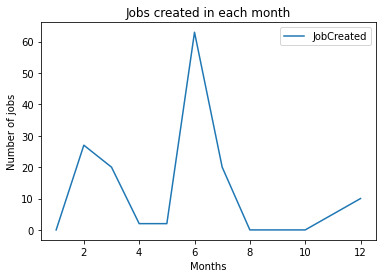

In [146]:
# Line plot of the total jobs created for each month.
dtt = pd.to_datetime(dat['Effective Date'])
dat['Months'] = dtt.dt.month
p = dat.groupby('Months').agg({'JobCreated' : 'sum'}).plot(legend=True)

plt.ylabel('Number of jobs')
plt.title('Jobs created in each month');